# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [28]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [30]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [31]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
    data_train1 = resize_images(data_train,(10,10))
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

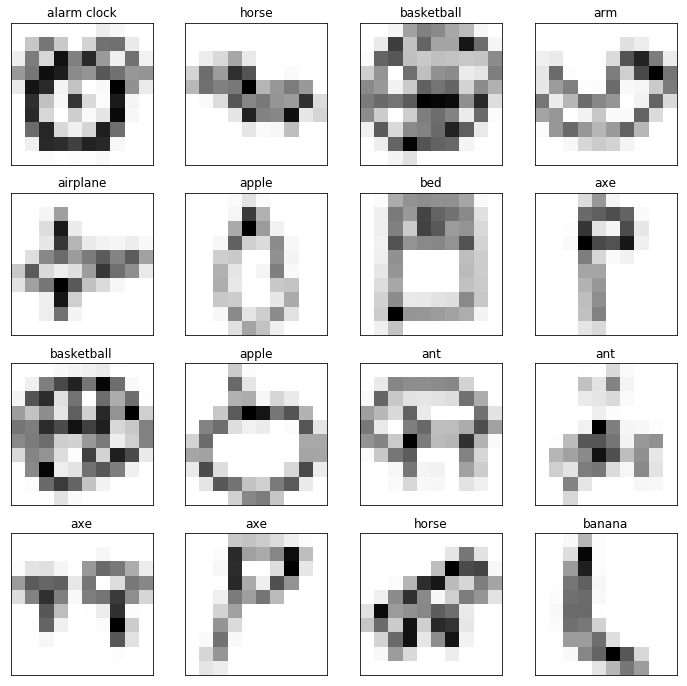

In [32]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train1.shape[0])
    plt.imshow(data_train1[ind,:].reshape((10,10)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [33]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [34]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train1.shape[1]))
#model.add(Dense(256, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train1, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 2s 21us/step - loss: 3.0426 - accuracy: 0.6916
Epoch 2/500
100000/100000 [==============================] - 2s 19us/step - loss: 0.9596 - accuracy: 0.7685
Epoch 3/500
100000/100000 [==============================] - 2s 20us/step - loss: 0.9445 - accuracy: 0.7781
Epoch 4/500
100000/100000 [==============================] - 2s 19us/step - loss: 0.9573 - accuracy: 0.7810
Epoch 5/500
100000/100000 [==============================] - 2s 20us/step - loss: 0.9639 - accuracy: 0.7830
Epoch 6/500
100000/100000 [==============================] - 2s 21us/step - loss: 0.9795 - accuracy: 0.7828
Epoch 7/500
100000/100000 [==============================] - 2s 21us/step - loss: 0.9945 - accuracy: 0.7831
Epoch 8/500
100000/100000 [==============================] - 2s 20us/step - loss: 1.0083 - accuracy: 0.7815
Epoch 9/500
100000/100000 [==============================] - 2s 20us/step - loss: 1.0197 - accuracy: 0.7808
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 3s 25us/step - loss: 1.2233 - accuracy: 0.7623 
Epoch 76/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.2317 - accuracy: 0.7623
Epoch 77/500
100000/100000 [==============================] - 3s 29us/step - loss: 1.2320 - accuracy: 0.7624
Epoch 78/500
100000/100000 [==============================] - 3s 29us/step - loss: 1.2333 - accuracy: 0.7617
Epoch 79/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.2368 - accuracy: 0.7594
Epoch 80/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.2289 - accuracy: 0.7601
Epoch 81/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.2363 - accuracy: 0.7595
Epoch 82/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.2425 - accuracy: 0.7604
Epoch 83/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.2423 - accuracy: 0.7606
Epoch 84/500
100000/100000 [===

100000/100000 [==============================] - 4s 35us/step - loss: 1.2998 - accuracy: 0.7271
Epoch 150/500
100000/100000 [==============================] - 3s 35us/step - loss: 1.2983 - accuracy: 0.7264
Epoch 151/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.2822 - accuracy: 0.7256
Epoch 152/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.2925 - accuracy: 0.7256
Epoch 153/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.2787 - accuracy: 0.7275
Epoch 154/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.2855 - accuracy: 0.7262
Epoch 155/500
100000/100000 [==============================] - 4s 37us/step - loss: 1.2890 - accuracy: 0.7249
Epoch 156/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.2976 - accuracy: 0.7243
Epoch 157/500
100000/100000 [==============================] - 4s 37us/step - loss: 1.2685 - accuracy: 0.7252
Epoch 158/500
100000/100

100000/100000 [==============================] - 6s 58us/step - loss: 1.2824 - accuracy: 0.7189
Epoch 224/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.2683 - accuracy: 0.7167
Epoch 225/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.2669 - accuracy: 0.7179
Epoch 226/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.2914 - accuracy: 0.7187
Epoch 227/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.2720 - accuracy: 0.7172
Epoch 228/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.2768 - accuracy: 0.7172
Epoch 229/500
100000/100000 [==============================] - 5s 45us/step - loss: 1.2787 - accuracy: 0.7184
Epoch 230/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.2653 - accuracy: 0.7176
Epoch 231/500
100000/100000 [==============================] - 4s 45us/step - loss: 1.2734 - accuracy: 0.7181
Epoch 232/500
100000/100

100000/100000 [==============================] - 5s 54us/step - loss: 1.2556 - accuracy: 0.7147
Epoch 298/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.2552 - accuracy: 0.7154
Epoch 299/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2491 - accuracy: 0.7148
Epoch 300/500
100000/100000 [==============================] - 6s 60us/step - loss: 1.2608 - accuracy: 0.7151
Epoch 301/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.2491 - accuracy: 0.7155
Epoch 302/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.2678 - accuracy: 0.7147
Epoch 303/500
100000/100000 [==============================] - 4s 45us/step - loss: 1.2643 - accuracy: 0.7132
Epoch 304/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.2417 - accuracy: 0.7158
Epoch 305/500
100000/100000 [==============================] - 5s 52us/step - loss: 1.2598 - accuracy: 0.7156
Epoch 306/500
100000/100

100000/100000 [==============================] - 6s 57us/step - loss: 1.2436 - accuracy: 0.7121
Epoch 371/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.2419 - accuracy: 0.7106
Epoch 372/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.2383 - accuracy: 0.7112
Epoch 373/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.2384 - accuracy: 0.7114
Epoch 374/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.2437 - accuracy: 0.7122
Epoch 375/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2369 - accuracy: 0.7113
Epoch 376/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.2402 - accuracy: 0.7101
Epoch 377/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.2434 - accuracy: 0.7110
Epoch 378/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.2351 - accuracy: 0.7108
Epoch 379/500
100000/100

100000/100000 [==============================] - 4s 43us/step - loss: 1.2527 - accuracy: 0.7051
Epoch 445/500
100000/100000 [==============================] - 4s 41us/step - loss: 1.2623 - accuracy: 0.7059
Epoch 446/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.2661 - accuracy: 0.7053
Epoch 447/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.2588 - accuracy: 0.7070
Epoch 448/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.2553 - accuracy: 0.7059
Epoch 449/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2559 - accuracy: 0.7063
Epoch 450/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2610 - accuracy: 0.7049
Epoch 451/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2495 - accuracy: 0.7051
Epoch 452/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2513 - accuracy: 0.7049
Epoch 453/500
100000/100

In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')